In [2]:
# Administrivia: modify this notebook so output text wraps.
from IPython.display import HTML, display
def set_css():
  display(HTML('''
  <style>
    pre {
      white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

# Set various proxies to download models and data
# !export HTTP_PROXY="http://proxy-01.pub.alcf.anl.gov:3128"
# !export HTTPS_PROXY="http://proxy-01.pub.alcf.anl.gov:3128"
# !export http_proxy="http://proxy-01.pub.alcf.anl.gov:3128"
# !export https_proxy="http://proxy-01.pub.alcf.anl.gov:3128"
# !export ftp_proxy="http://proxy-01.pub.alcf.anl.gov:3128" 

In [3]:
%pip install transformers

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
from transformers import pipeline

# In this framework, setting  up a "pipeline" involves selecting a (pre-trained) model,
# and a task---in this case, text generation 
generator = pipeline("text-generation", model='gpt2')

prompt = "I'm late because"

# We request 5 completions of the prompt, of length 25 words
res = generator(prompt, max_length=25, num_return_sequences=5)

# What did we get?
for each in res:
    print(each['generated_text'])
    print('******************"')
    

2024-04-09 06:53:06.158119: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/soft/datascience/conda/2023-01-10/mconda3/lib/python3.10/site-packages/transformers/generation/utils.py:1186: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use a generation configuration file (see https://huggingface.co/docs/transformers/main_classes/text_generation)
  warnings.warn(
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


I'm late because our game plan is not working."

Lopez would need to make his third stint in the majors
******************"
I'm late because I have all of you up.

"If you do something and I'm the one having it
******************"
I'm late because my mother's sick, and they have the best hospital in town."


A couple of times,
******************"
I'm late because I was too busy this morning to get it scheduled."

The woman also said she'd done another
******************"
I'm late because my friend was doing her best to help me out," she said. "I just came here to see
******************"


In [5]:
res = generator(prompt, max_length=100, num_return_sequences=1)
print(res[0]['generated_text'])
print('******************"')

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


I'm late because of the delay. I'm not sure if it was my age, but I was a freshman," he said. "I had a lot of people come to see us, and it turned out to be a huge success." After four games, Houghton said he felt like that season came out of nowhere. The Lions' defense stood up to play the Broncos. In the four games before that, the Lions went 20-1 (14-2-0,.615
******************"


In [6]:
from transformers import AutoTokenizer

# A utility function to tokenize a sequence and print out some information about it.

def tokenization_summary(tokenizer, sequence):

    # get the vocabulary
    vocab = tokenizer.vocab
    # Number of entries to print
    n = 10

    # Print subset of the vocabulary
    print("Subset of tokenizer.vocab:")
    for i, (token, index) in enumerate(tokenizer.vocab.items()):
        print(f"{token}: {index}")
        if i >= n - 1:
            break

    print("Vocab size of the tokenizer = ", len(vocab))
    print("------------------------------------------")

    # .tokenize chunks the existing sequence into different tokens based on the rules and vocab of the tokenizer.
    tokens = tokenizer.tokenize(sequence)
    print("Tokens : ", tokens)
    print("------------------------------------------")

    # .convert_tokens_to_ids or .encode or .tokenize converts the tokens to their corresponding numerical representation.
    #  .convert_tokens_to_ids has a 1-1 mapping between tokens and numerical representation
    # ids = tokenizer.convert_tokens_to_ids(tokens)
    # print("encoded Ids: ", ids)

    # .encode also adds additional information like Start of sequence tokens and End of sequene
    print("tokenized sequence : ", tokenizer.encode(sequence))

    # .tokenizer has additional information about attention_mask.
    # encode = tokenizer(sequence)
    # print("Encode sequence : ", encode)
    # print("------------------------------------------")

    # .decode decodes the ids to raw text
    ids = tokenizer.convert_tokens_to_ids(tokens)
    decode = tokenizer.decode(ids)
    print("Decode sequence : ", decode)


tokenizer_1  =  AutoTokenizer.from_pretrained("gpt2") # GPT-2 uses "Byte-Pair Encoding (BPE)"

sequence = "Counselor, please adjust your Zoom filter to appear as a human, rather than as a cat"

tokenization_summary(tokenizer_1, sequence)

Subset of tokenizer.vocab:
ĠGPL: 38644
Minnesota: 45670
Ġrace: 3234
ĠSnake: 16705
pox: 42557
ĠAjax: 46362
Ġpuck: 20695
ĠRush: 13063
ĠRot: 18481
Ġdelete: 12233
Vocab size of the tokenizer =  50257
------------------------------------------
Tokens :  ['Coun', 'sel', 'or', ',', 'Ġplease', 'Ġadjust', 'Ġyour', 'ĠZoom', 'Ġfilter', 'Ġto', 'Ġappear', 'Ġas', 'Ġa', 'Ġhuman', ',', 'Ġrather', 'Ġthan', 'Ġas', 'Ġa', 'Ġcat']
------------------------------------------
tokenized sequence :  [31053, 741, 273, 11, 3387, 4532, 534, 40305, 8106, 284, 1656, 355, 257, 1692, 11, 2138, 621, 355, 257, 3797]
Decode sequence :  Counselor, please adjust your Zoom filter to appear as a human, rather than as a cat


In [7]:
tokenizer_2  =  AutoTokenizer.from_pretrained("bert-base-cased") # BERT uses WordPiece encoding

tokenization_summary(tokenizer_2, sequence)

Subset of tokenizer.vocab:
Qatar: 12778
##ל: 28456
rush: 6274
faction: 10673
portions: 8924
Richter: 21954
##marked: 19384
Fraser: 9156
flux: 24256
miniseries: 15570
Vocab size of the tokenizer =  28996
------------------------------------------
Tokens :  ['Counsel', '##or', ',', 'please', 'adjust', 'your', 'Zoo', '##m', 'filter', 'to', 'appear', 'as', 'a', 'human', ',', 'rather', 'than', 'as', 'a', 'cat']
------------------------------------------
tokenized sequence :  [101, 18645, 1766, 117, 4268, 14878, 1240, 13899, 1306, 12123, 1106, 2845, 1112, 170, 1769, 117, 1897, 1190, 1112, 170, 5855, 102]
Decode sequence :  Counselor, please adjust your Zoom filter to appear as a human, rather than as a cat


In [8]:
%matplotlib inline
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from transformers import BertTokenizer, BertModel, BertForMaskedLM
import sys
np.set_printoptions(threshold=sys.maxsize)
plt.rcParams['figure.figsize'] = [100, 60]

# Load BERT.
model = BertModel.from_pretrained('bert-large-uncased-whole-word-masking')
# Set the model to eval mode.
model.eval()
# This notebook assumes CPU execution. If you want to use GPUs, put the model on cuda and modify subsequent code blocks.
#model.to('cuda')
# Load tokenizer.
tokenizer = BertTokenizer.from_pretrained('bert-large-uncased-whole-word-masking')

# Save the BERT vocabulary to a file -- by default it will name this file "vocab.txt".
tokenizer.save_vocabulary(save_directory='.')

print("The vocabulary size is: ", model.config.vocab_size) # Size of the vocabulary

Some weights of the model checkpoint at bert-large-uncased-whole-word-masking were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


The vocabulary size is:  30522


In [9]:
# Get BERT's vocabulary embeddings.
wordembs = model.get_input_embeddings()

# Convert the vocabulary embeddings to numpy.
allinds = np.arange(0,model.config.vocab_size,1)
inputinds = torch.LongTensor(allinds)
bertwordembs = wordembs(inputinds).detach().numpy()
print(bertwordembs.shape)

(30522, 1024)


In [10]:
# Read in the vocabulary
filename = "vocab.txt"
with open(filename,'r') as f:
    bertwords = np.array([])
    for line in f:
        bertwords = np.append(bertwords, line.rstrip())

# Determine vocabulary to use for t-SNE/visualization. The indices are hard-coded based partially on inspection:
bert_char_indices_to_use = np.arange(999, 1063, 1)
bert_voc_indices_to_plot = np.append(bert_char_indices_to_use, np.arange(1996, 5932, 1))
bert_voc_indices_to_use = np.append(bert_char_indices_to_use, np.arange(1996, 11932, 1))

bert_voc_indices_to_use_tensor = torch.LongTensor(bert_voc_indices_to_use)
bert_word_embs_to_use = wordembs(bert_voc_indices_to_use_tensor).detach().numpy()
bert_words_to_plot = bertwords[bert_voc_indices_to_plot]


print(len(bert_voc_indices_to_plot))
print(len(bert_voc_indices_to_use))


4000
10000


In [11]:
# Run t-SNE on the BERT vocabulary embeddings we selected:
mytsne_words = TSNE(n_components=2,early_exaggeration=12,verbose=2,metric='cosine',init='pca',n_iter=2500)
bert_word_embs_to_use_tsne = mytsne_words.fit_transform(bert_word_embs_to_use)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.003s...
[t-SNE] Computed neighbors for 10000 samples in 1.321s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.267747
[t-SNE] Computed conditional probabilities in 0.177s
[t-SNE] Iteration 50: error = 97.8549118, gradient norm = 0.0071696 (50 iterations in 0.567s)
[t-SNE] It

<function matplotlib.pyplot.show(close=None, block=None)>

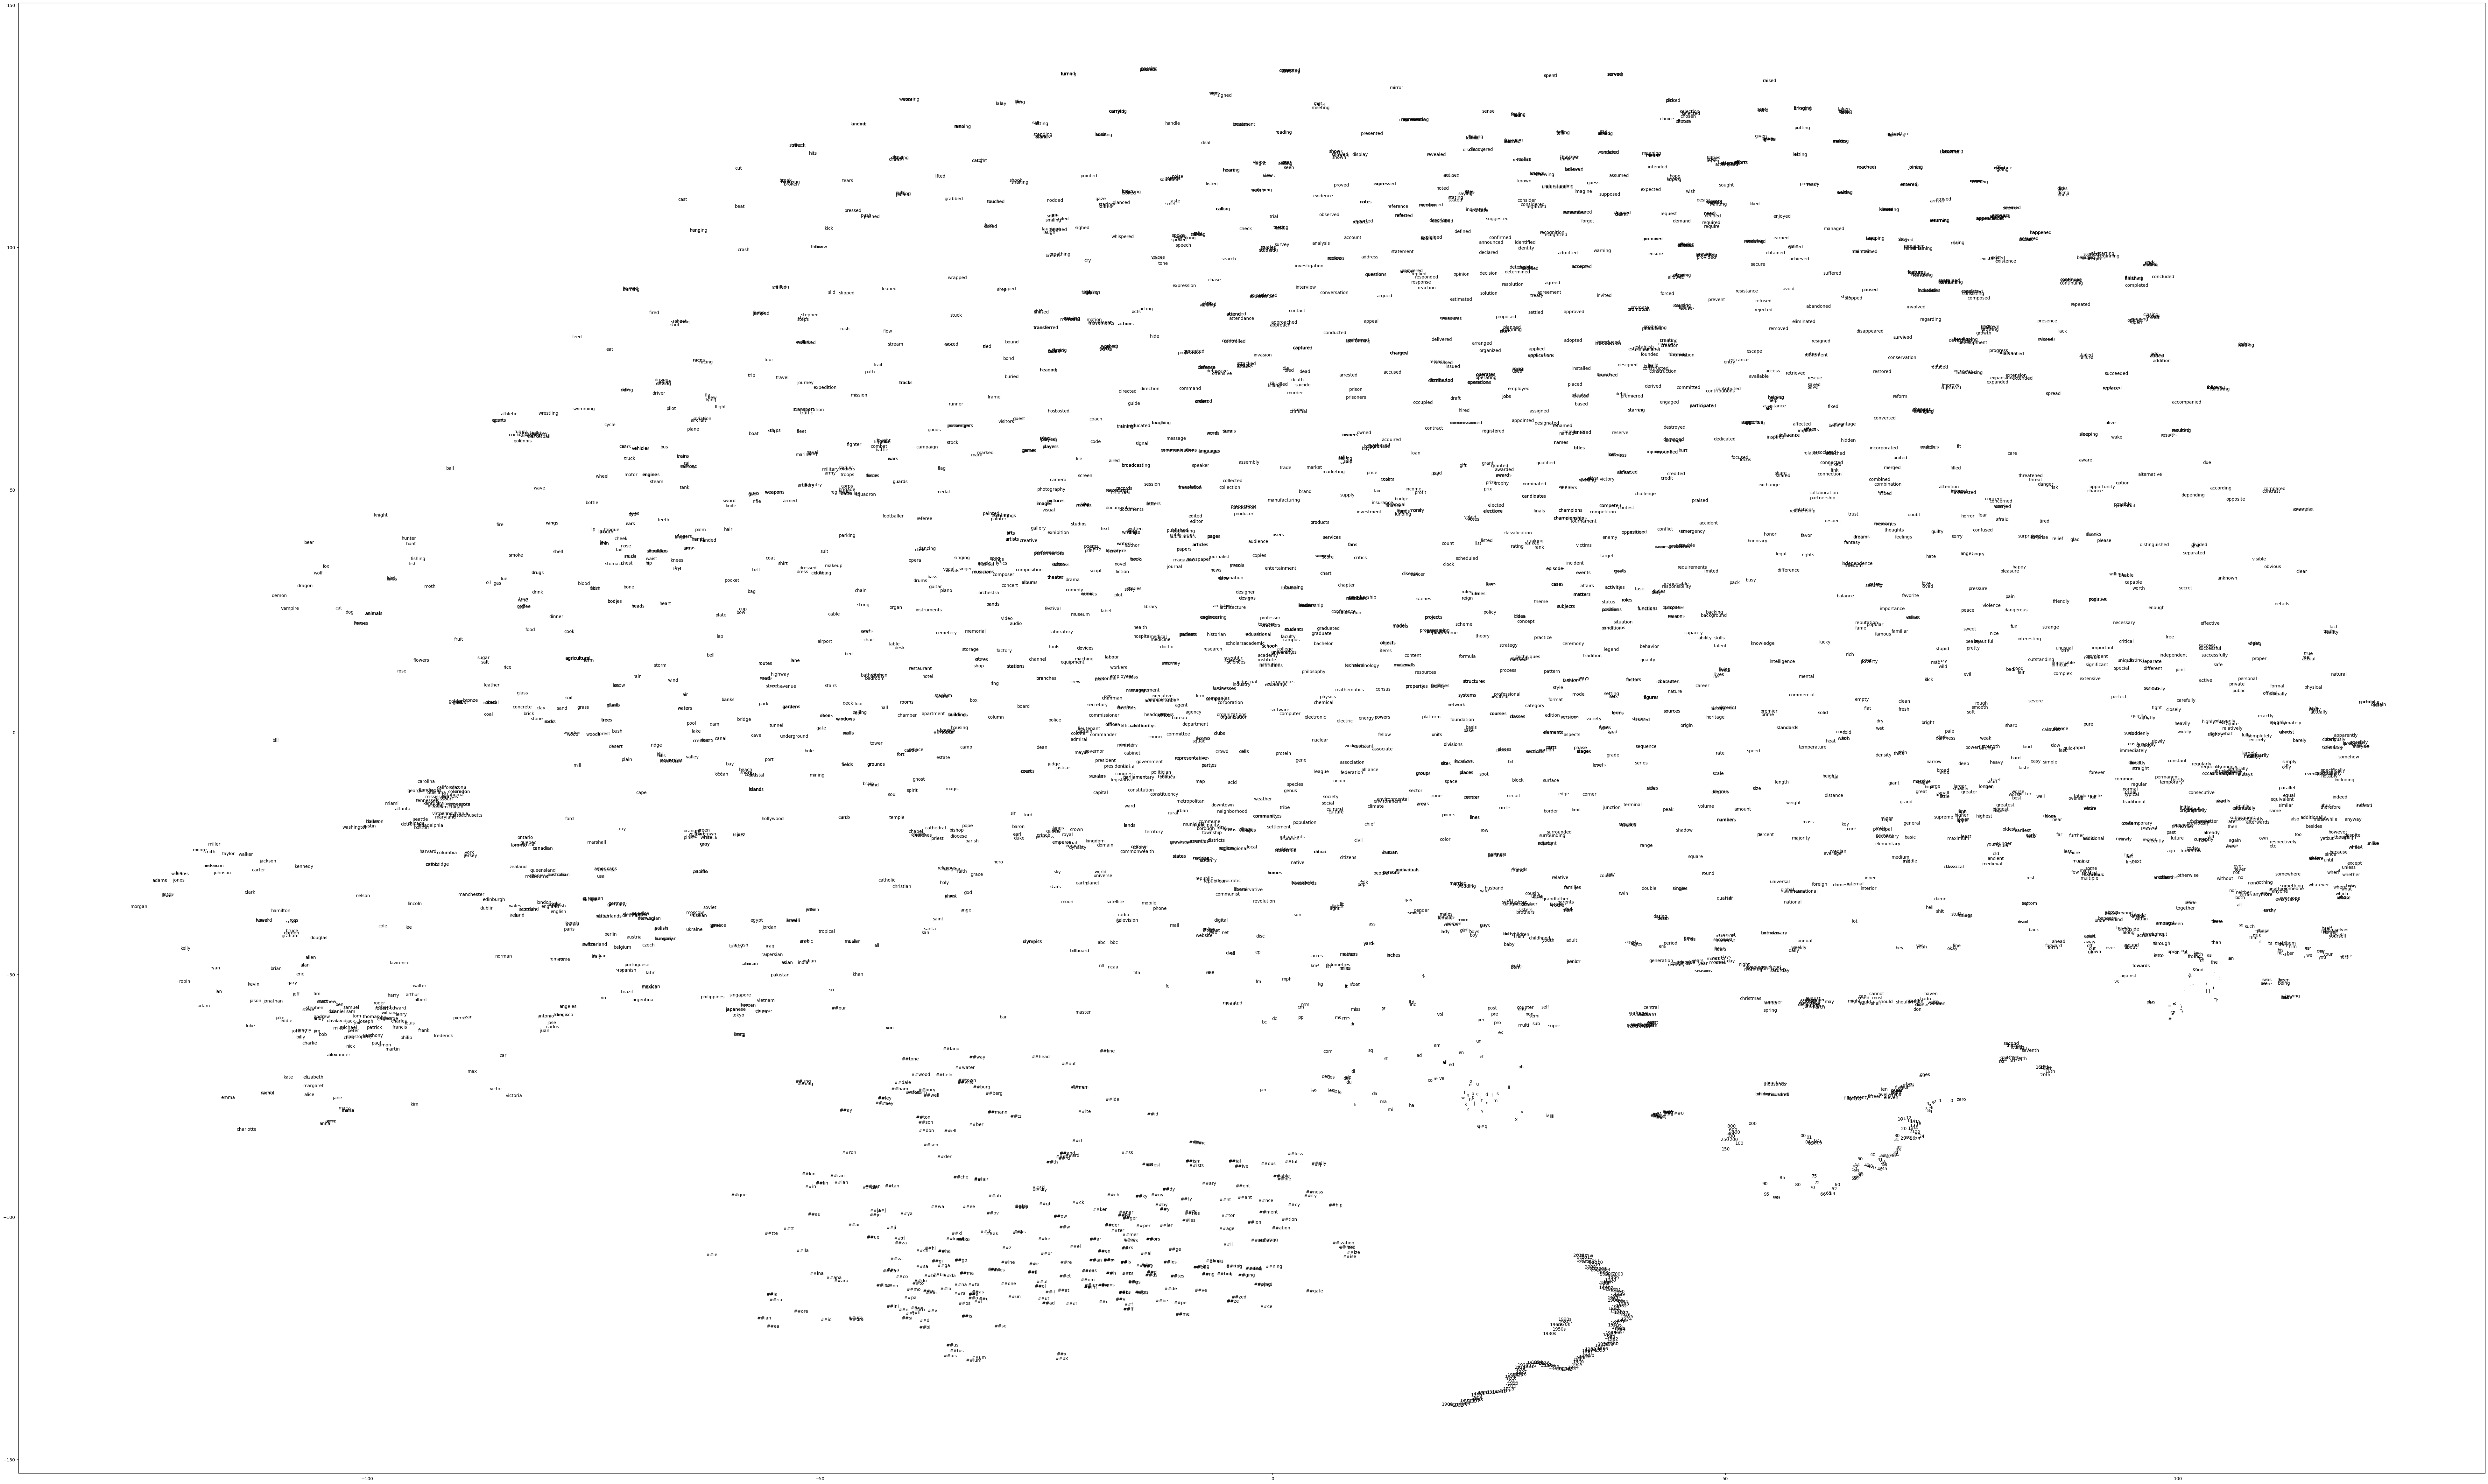

In [12]:
# Plot the transformed BERT vocabulary embeddings:
fig = plt.figure()
alltexts = list()
for i, txt in enumerate(bert_words_to_plot):
    plt.scatter(bert_word_embs_to_use_tsne[i,0], bert_word_embs_to_use_tsne[i,1], s=0)
    currtext = plt.text(bert_word_embs_to_use_tsne[i,0], bert_word_embs_to_use_tsne[i,1], txt, family='sans-serif')
    alltexts.append(currtext)
    

# Save the plot before adjusting.
plt.savefig('viz-bert-voc-tsne10k-viz4k-noadj.pdf', format='pdf')

plt.show

In [13]:
###Homework Part####

import string
import re
from operator import itemgetter

# Translation table to remove punctuation
translator = str.maketrans('', '', string.punctuation)

# Initialize an empty dictionary to store word occurrences
wdict = {}

# Read the file 'Life_On_The_Mississippi.txt'
with open('Life_On_The_Mississippi.txt', 'r', encoding='utf-8-sig') as L:
    # Read the first line
    line = L.readline()
    nlines = 1

    # Loop through the lines and process each line
    while line:
        # Remove Unicode characters
        line = re.sub(r'[^\x00-\x7f]', '', line)
        
        # Remove Byte-Order Mark (BOM)
        line = line.lstrip('\ufeff')
        
        # Remove punctuation and convert to lowercase
        line = line.translate(translator).lower()
        
        # Split the line into words
        words = line.split()
        
        # Update the word count dictionary
        for word in words:
            wdict[word] = wdict.get(word, 0) + 1
        
        # Read the next line
        line = L.readline()
        nlines += 1

# Sort wdict by word occurrence frequency
sorted_wdict = sorted(wdict.items(), key=itemgetter(1), reverse=True)

# Find the top 100 most frequent word tokens
top100 = sorted_wdict[:100]

# Calculate the total word occurrences
total_occurrences = sum(count for word, count in sorted_wdict)

# Calculate the cumulative sum of word occurrences
cumulative_sum = 0
distinct_words = 0
for word, count in sorted_wdict:
    cumulative_sum += count
    distinct_words += 1
    if cumulative_sum >= 0.9 * total_occurrences:
        break

print("Top 100 most frequent word tokens:")
for word, count in top100:
    print(f"{word}: {count}")

print("\nNumber of distinct word tokens making up the top 90% of word occurrences:", distinct_words)



Top 100 most frequent word tokens:
the: 9255
and: 5892
of: 4532
a: 4053
to: 3592
in: 2593
it: 2293
i: 2205
was: 2093
that: 1724
he: 1402
is: 1148
for: 1095
with: 1081
you: 1033
his: 961
had: 961
but: 952
on: 947
as: 881
this: 781
they: 758
at: 750
not: 722
all: 720
by: 713
one: 686
there: 627
were: 625
be: 617
my: 582
or: 581
from: 577
have: 571
out: 541
so: 536
up: 529
him: 523
we: 519
me: 516
when: 505
would: 478
which: 476
river: 457
an: 440
them: 425
no: 422
then: 405
said: 399
are: 387
if: 381
their: 378
now: 369
about: 346
time: 337
been: 335
down: 328
its: 323
could: 313
has: 305
will: 301
into: 300
what: 285
her: 278
two: 273
do: 271
other: 270
some: 269
man: 260
new: 259
any: 238
got: 234
these: 233
she: 233
who: 229
more: 226
water: 222
did: 214
before: 208
over: 202
way: 202
hundred: 200
upon: 200
here: 199
after: 195
day: 193
than: 192
well: 191
through: 191
get: 190
old: 186
every: 186
can: 185
boat: 184
went: 183
never: 182
good: 181
years: 181
see: 176
know: 175

Number 

In [14]:
#Section 2
#For the zoomed in cluster, I wanted to try and find words that cluster together and are nouns, so I used the SpaCy library to identify nouns
%pip install spacy

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [15]:
#This is the specific english model we need to find the nouns
!python -m spacy download en_core_web_sm

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/soft/datascience/conda/2023-01-10/mconda3/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.12.2 when it was built against 1.12.1, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 73.9 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


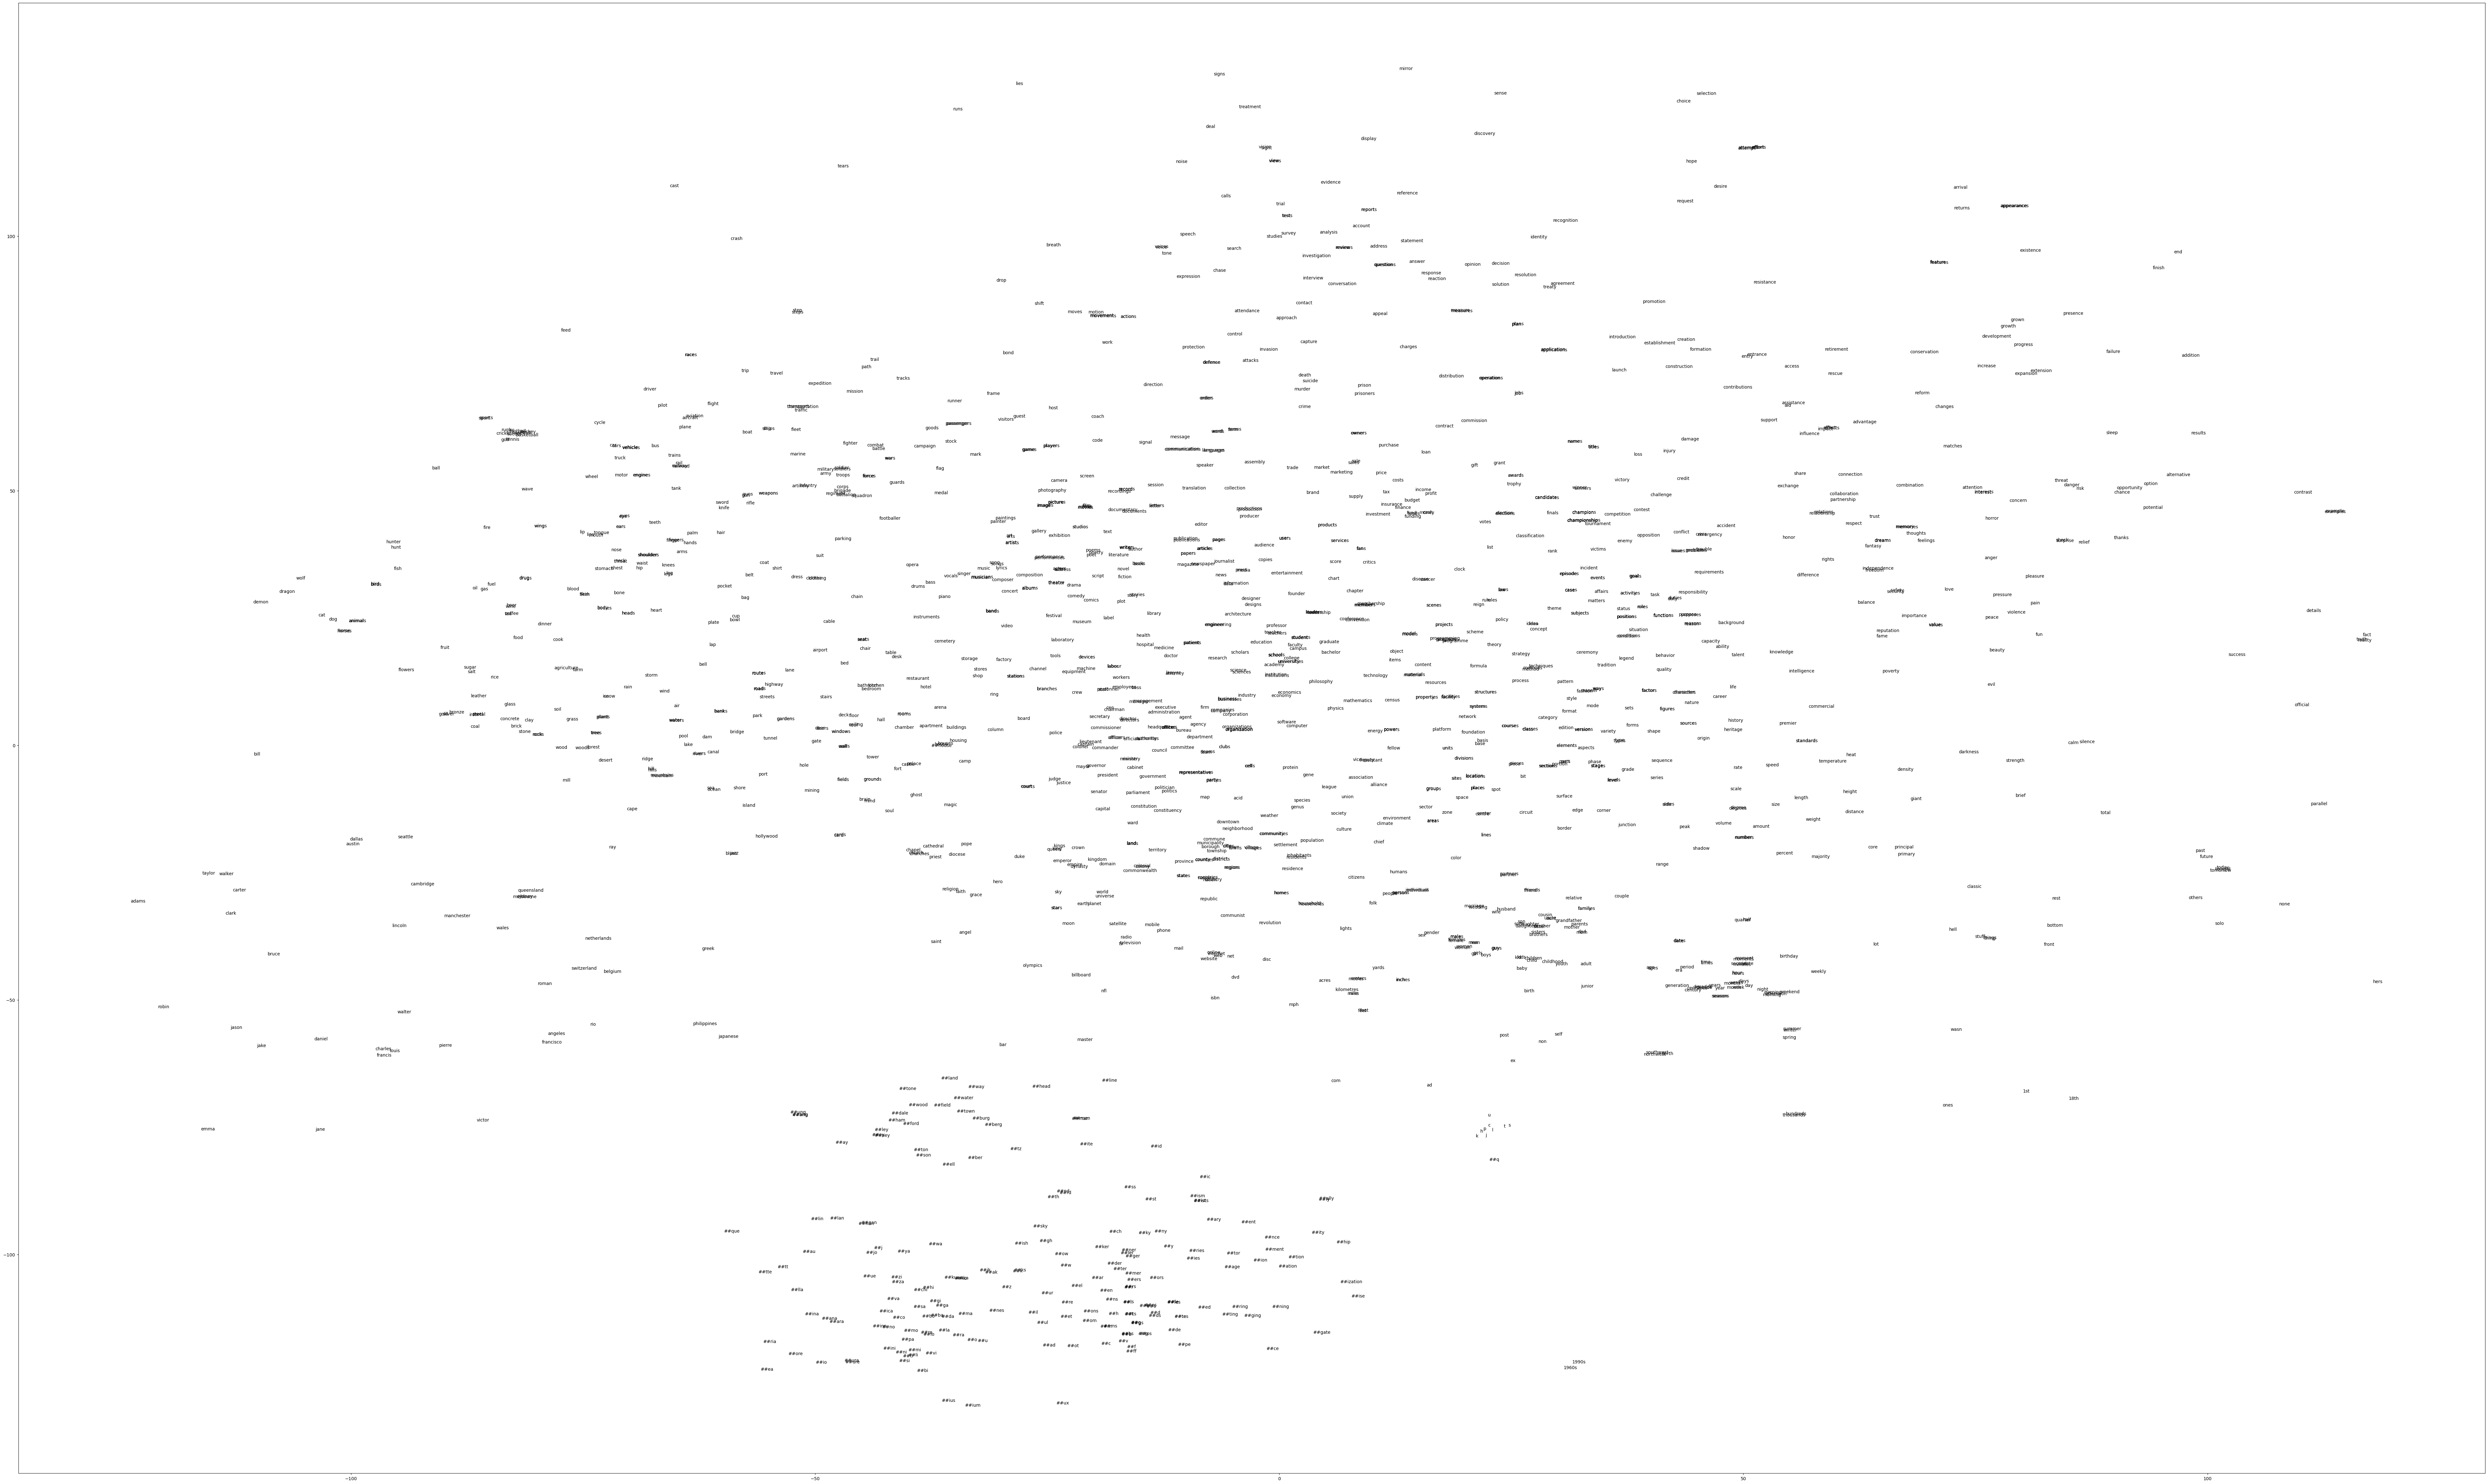

In [17]:
#This generates the general cluster image
import matplotlib.pyplot as plt
import spacy

# Load the English tokenizer, tagger, parser, NER, and word vectors
nlp = spacy.load("en_core_web_sm")

# Plot the transformed BERT vocabulary embeddings:
fig = plt.figure()
alltexts = []

# Function to filter nouns
def is_noun(token):
    return token.pos_ == 'NOUN'  # 'NOUN' indicates noun

for i, txt in enumerate(bert_words_to_plot):
    # Process the text with SpaCy
    doc = nlp(str(txt))
    
    # Check if any word in the tokenized text is a noun
    if any(is_noun(token) for token in doc):
        plt.scatter(bert_word_embs_to_use_tsne[i,0], bert_word_embs_to_use_tsne[i,1], s=0)
        currtext = plt.text(bert_word_embs_to_use_tsne[i,0], bert_word_embs_to_use_tsne[i,1], txt, family='sans-serif')
        alltexts.append(currtext)

# Save the plot before adjusting
plt.savefig('viz-bert-voc-tsne10k-viz4k-noadj.pdf', format='pdf')

plt.show()


Place Names


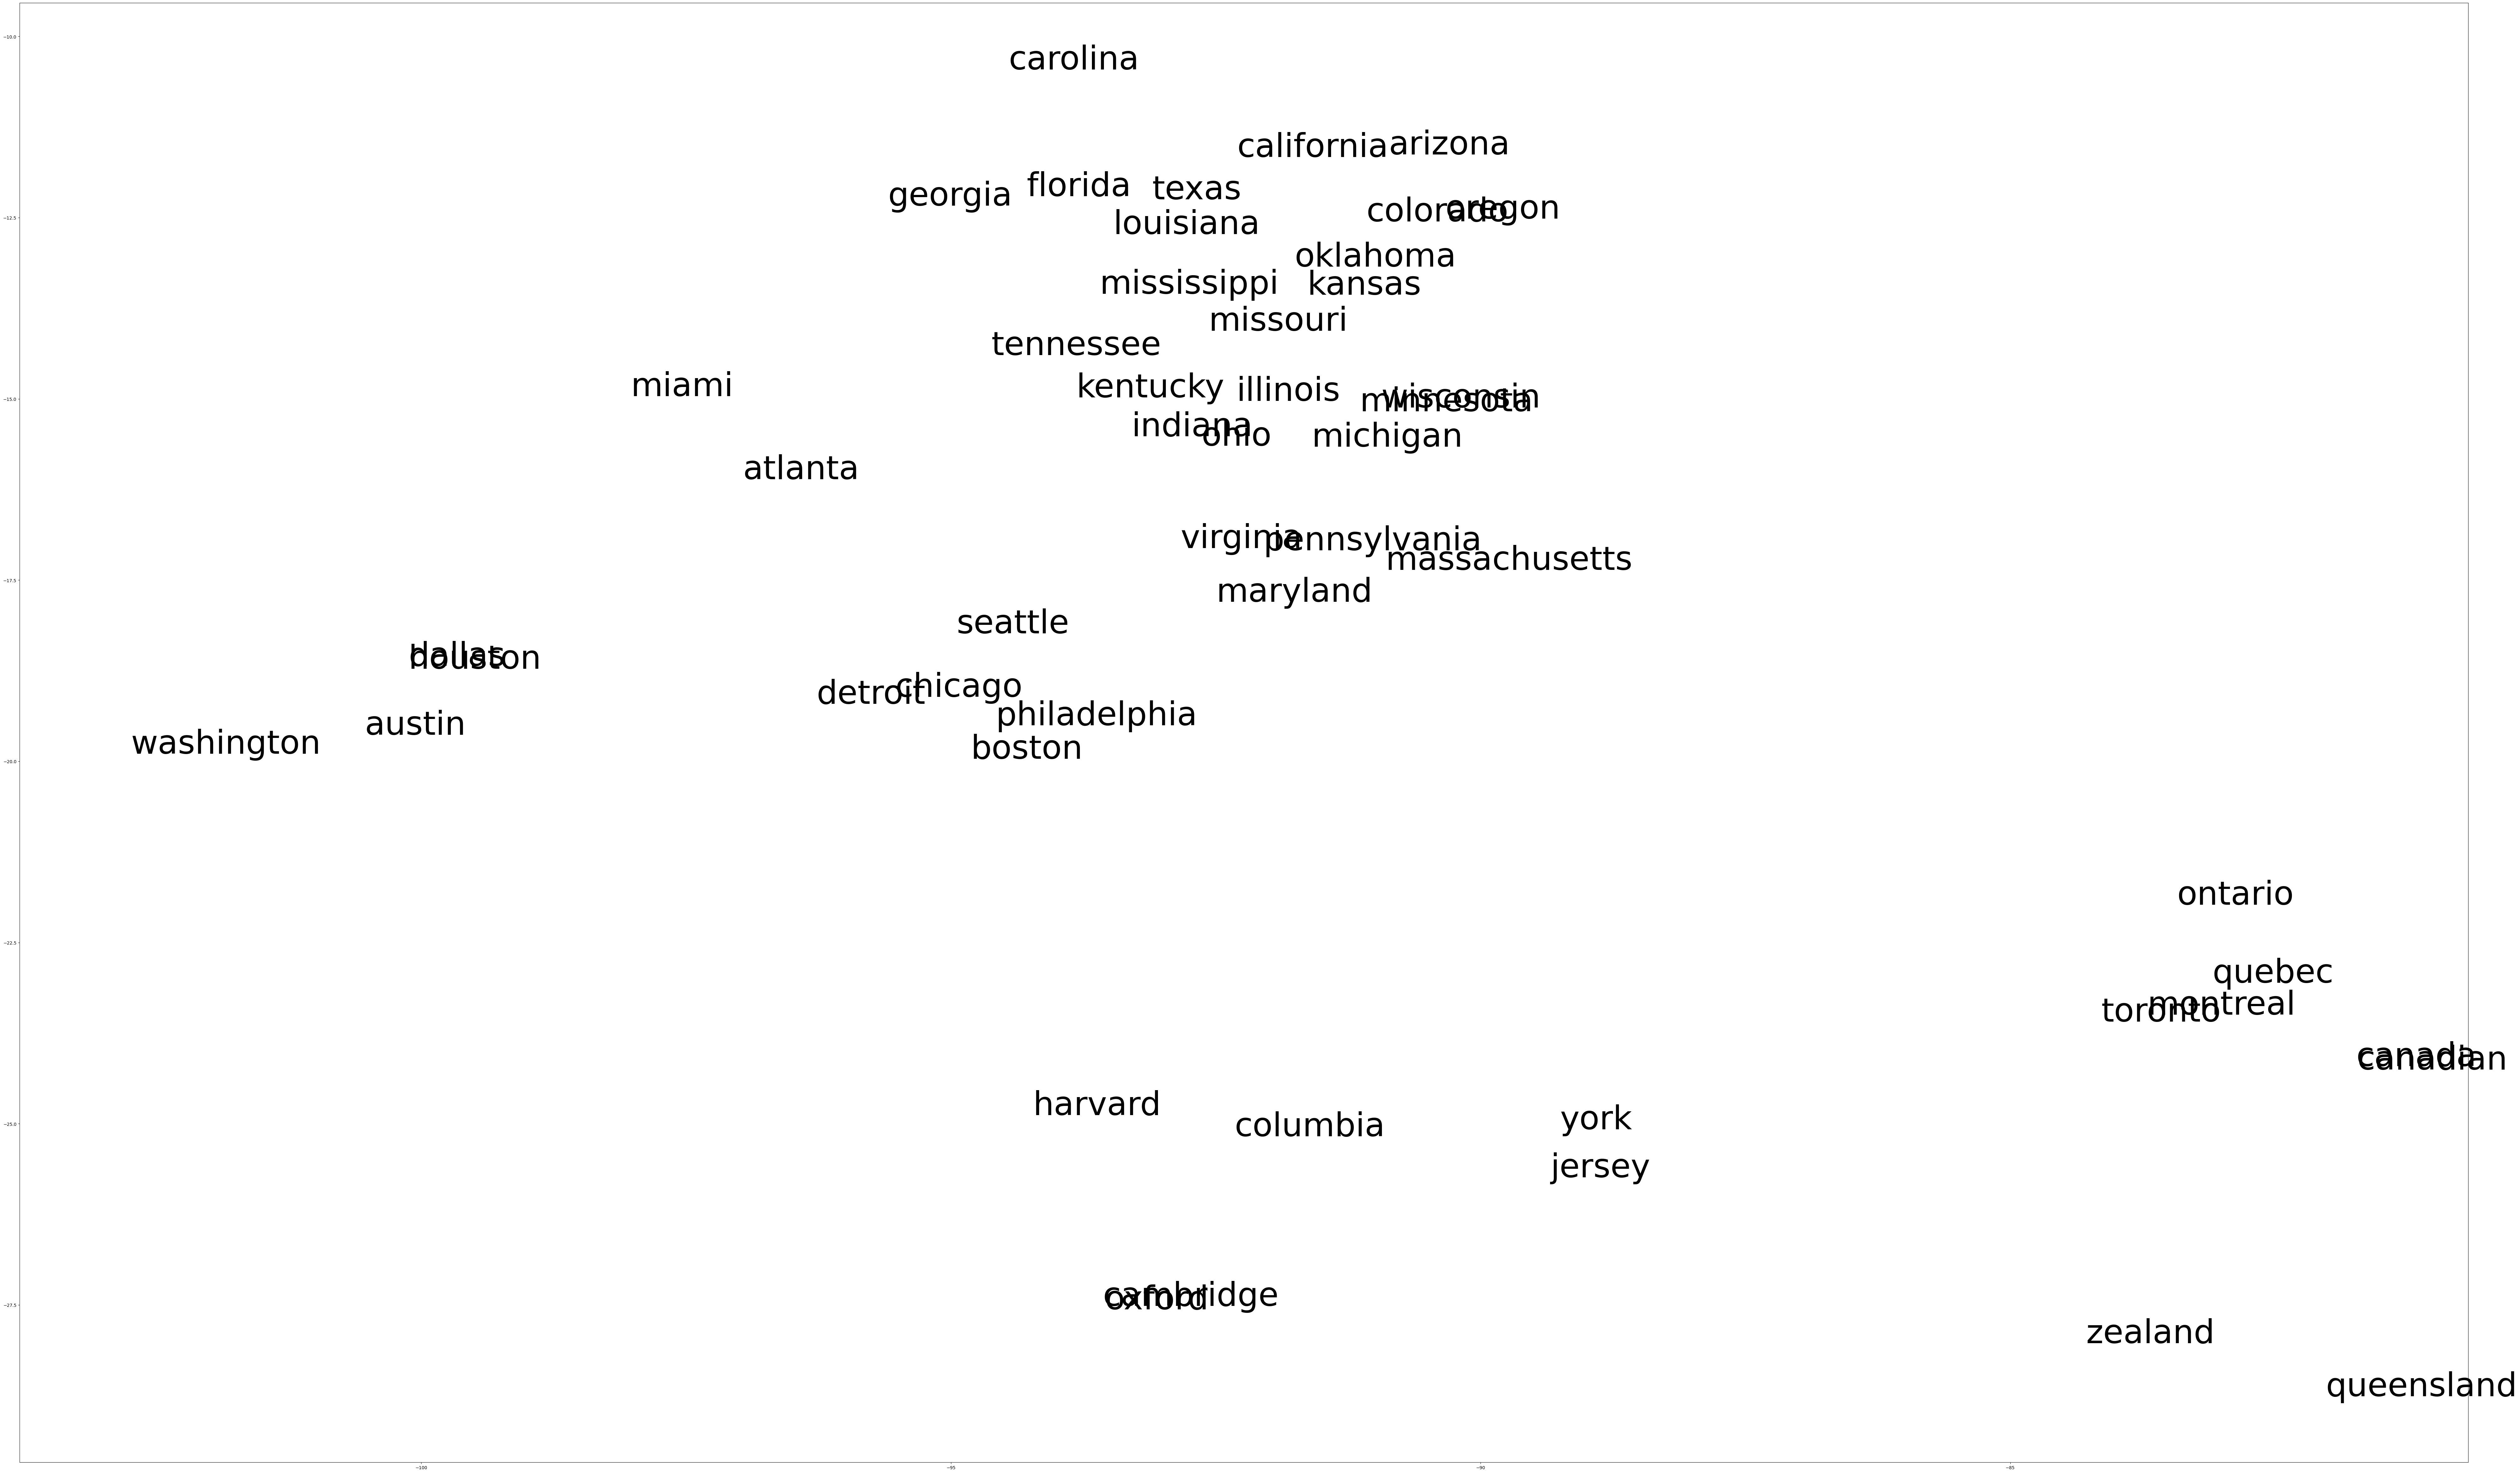

Time relations


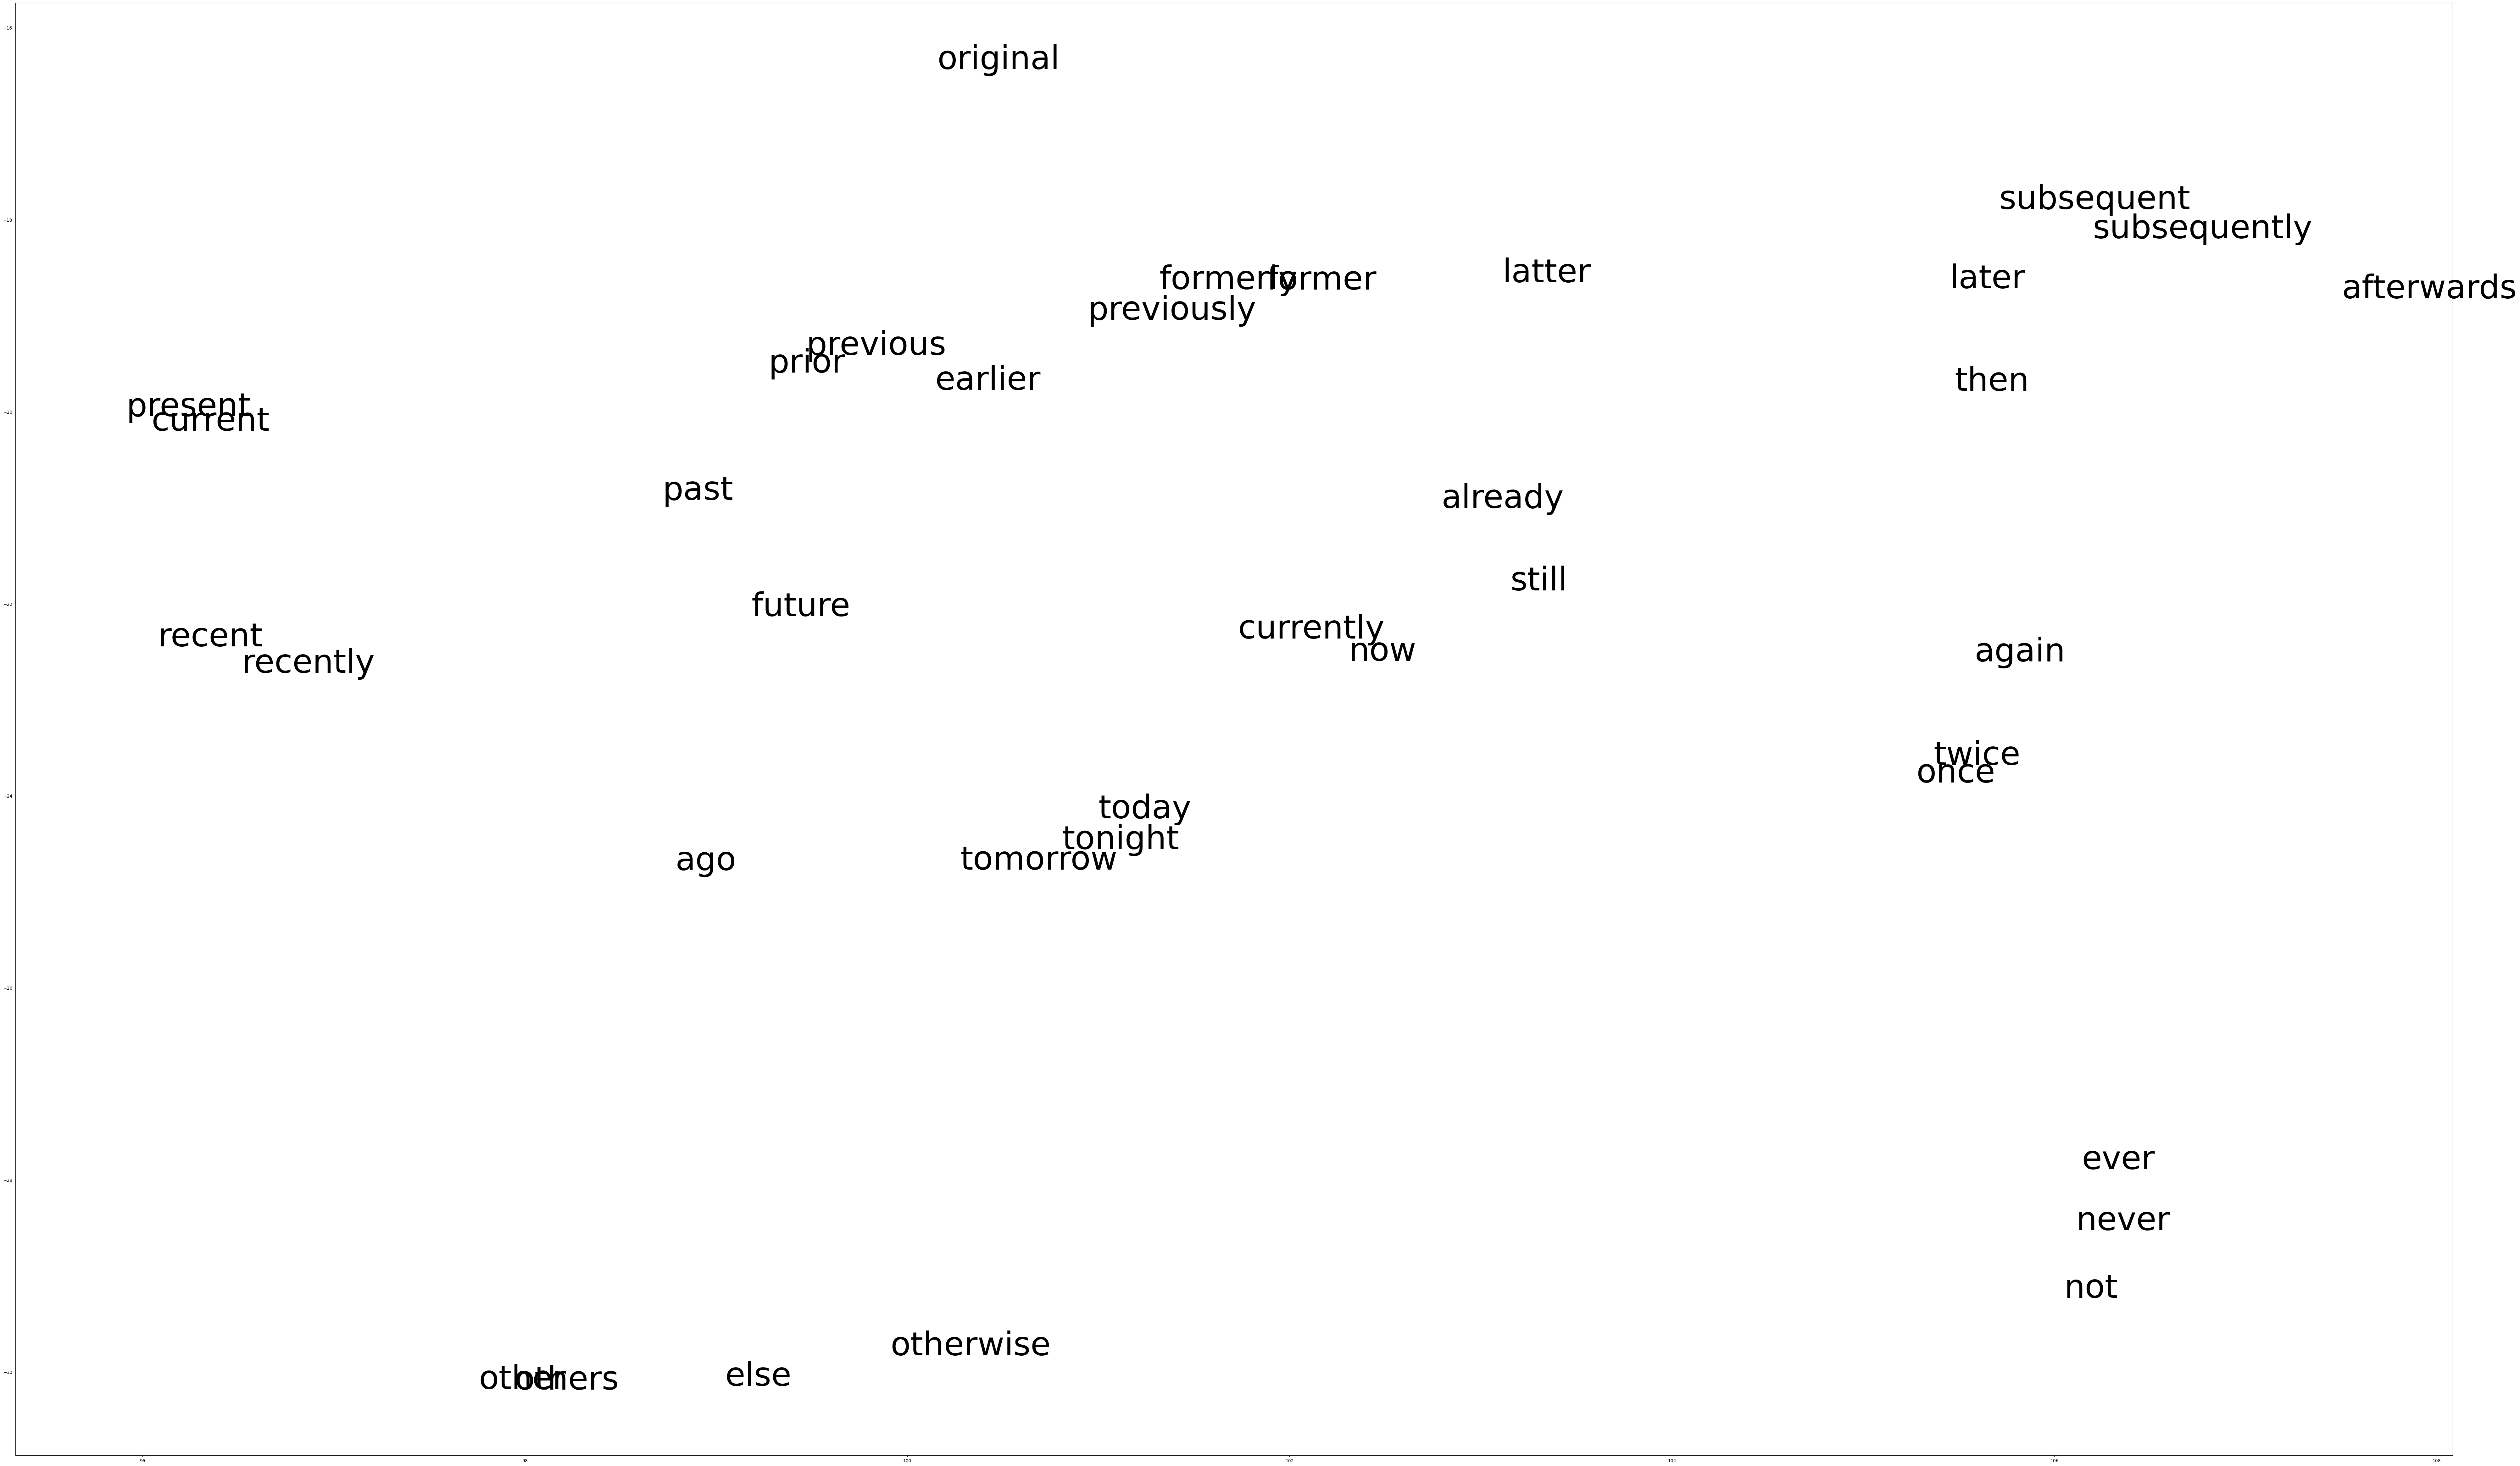

In [18]:
#This generates the zoomed images
import matplotlib.pyplot as plt
import spacy
import numpy as np

# Load the English tokenizer, tagger, parser, NER, and word vectors
nlp = spacy.load("en_core_web_sm")

# Define nplotted, x_left, x_right, y_left, y_right, xwidth, ywidth
nplotted = len(bert_words_to_plot)
x_left = np.min(bert_word_embs_to_use_tsne[:nplotted,0])
x_right = np.max(bert_word_embs_to_use_tsne[:nplotted,0])
y_left = np.min(bert_word_embs_to_use_tsne[:nplotted,1])
y_right = np.max(bert_word_embs_to_use_tsne[:nplotted,1])
xwidth = x_right - x_left
ywidth = y_right - y_left

# Function to filter nouns
def is_noun(token):
    return token.pos_ == 'NOUN'  # 'NOUN' indicates noun

# Define plotwindow function
def plotwindow(window_xfrac, window_yfrac, window_xoff, window_yoff):
    newxl_center = x_left + xwidth * window_xoff
    newxl_left = newxl_center - 0.5 * window_xfrac * xwidth
    newxl_right =  newxl_center + 0.5 * window_xfrac * xwidth

    newyl_center = y_left + ywidth * window_yoff
    newyl_left = newyl_center - 0.5 * window_yfrac * ywidth
    newyl_right =  newyl_center + 0.5 * window_yfrac * ywidth

    x_inds_r = bert_word_embs_to_use_tsne[:nplotted,0] < newxl_right 
    x_inds_l = bert_word_embs_to_use_tsne[:nplotted,0] > newxl_left
    x_inds = np.logical_and(x_inds_l, x_inds_r)

    y_inds_r = bert_word_embs_to_use_tsne[:nplotted,1] < newyl_right
    y_inds_l = bert_word_embs_to_use_tsne[:nplotted,1] > newyl_left
    y_inds = np.logical_and(y_inds_l, y_inds_r)

    inds = np.logical_and(x_inds, y_inds)

    bwtp = bert_words_to_plot[inds]
    bwembs = bert_word_embs_to_use_tsne[:nplotted,:][inds,:]

    for i, txt in enumerate(bwtp):
        plt.scatter(bwembs[i,0], bwembs[i,1], s=0)
        plt.text(bwembs[i,0], bwembs[i,1], txt, family='sans-serif', size=75)

    plt.show()

#Calling the function
window_xfrac = 0.1
window_yfrac = 0.1
window_xoff = 0.14
window_yoff = 0.45
print("Place Names")
plotwindow(window_xfrac, window_yfrac, window_xoff, window_yoff)

window_xfrac = 0.05
window_yfrac = 0.05
window_xoff = 0.92
window_yoff = 0.42
print("Time relations")
plotwindow(window_xfrac, window_yfrac, window_xoff, window_yoff)